# Differential Analysis 

## Purpose: 
* Merge Data 
* Heatmaps 
* Inspect Distributions 
* Differential Analysis 
    * All Cells
        * Features 
        * Metals (Negative Control)
    * Cell-type Specific 
        * Features 
        * Metals (Negative Control)


## Packages and Options

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats
import statsmodels.stats.multitest


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 1000000
pd.options.display.max_columns = 100000


## Load Data & Merge Columns 

In [2]:
counts = pd.read_csv("../../4_get_data_from_chosen_hyperparameters/output/data/arcsinh_transformed_matrix.csv")
metadata = pd.read_csv("../../4_get_data_from_chosen_hyperparameters/output/data/metadata.csv")

In [3]:
counts.head()
metadata.head()

,102Pd,104Pd,105Pd,106Pd,108Pd,110Pd,113In,127I,131Xe,138Ba,140Ce,141Pr_CD70,142Ce,142Nd_CD19,143Nd_CD123,144Nd_CD11b,145Nd,146Nd_IgD,147Sm_CD11c,148Nd_PD-L1,149Sm_CD200,150Nd_CD43,151Eu_CD14,152Sm_CD95,153Eu_TIM-3,154Sm,155Gd_BAFFR,156Gd_CD86,158Gd_CD137L,159Tb_CD22,160Dy,160Gd_CD200R,161Dy,162Dy_CD80,163Dy_CD95L,164Dy_GITRL,165Ho_CD40,166Er_SIGLEC_10,167Er_CD27,168Er_OX40L,169Tm_CD24,170Er_CD3,171Yb_CD20,172Yb_IgM,173Yb_CD137,174Yb_HLA-DR,175Lu_PD-1,176Lu,176Yb_CD56,190BCKG,191Ir,193Ir,194Pt,195Pt,198Pt,208Pb,209Bi_CD16,89Y_CD45
0,5.229266,5.475317,5.351139,2.413161,2.548414,1.206183,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.538412,2.541206,0.00000,0.246015,0.0,0.460550,0.000000,0.403228,0.044840,2.014863,0.327153,1.049158,0.000000,0.000000,4.776168,0.346733,0.000000,0.737765,0.020450,0.125441,0.000000,0.000000,0.000000,0.000000,0.863426,3.197715,3.856281,0.000000,1.662190,0.000000,3.257347,3.405502,0.016720,1.650265,0.763556,0.000000,0.000000,0.000000,5.323034,5.693451,4.081045,4.239795,2.061514,0.000000,0.100381,5.744617
1,5.419303,5.384562,5.471449,2.682050,1.729744,1.342953,0.0,0.0,0.0,0.503014,0.000000,0.000000,1.572103,1.558920,0.00000,0.000000,0.0,0.113303,0.000000,0.224595,0.000000,0.356100,0.484528,0.063225,0.000000,0.000000,3.705220,0.052391,0.000000,1.272306,0.762924,0.759182,0.000000,0.828482,0.000000,0.000000,2.890338,2.926367,2.018128,0.000000,1.406639,0.000000,2.328468,2.187479,0.000000,2.947934,0.000000,0.276938,0.228440,0.000000,5.081120,5.586021,4.224440,4.431610,2.756036,0.000000,0.030517,5.102969
2,4.868694,5.061817,5.078876,2.490740,2.356433,1.780095,0.0,0.0,0.0,0.000000,0.274326,0.000000,1.561190,1.563391,0.00000,0.612106,0.0,0.000000,1.527871,0.433115,0.060362,2.245648,0.102927,1.400713,0.000000,0.270239,5.082235,4.948058,0.834354,2.909311,1.901590,1.907294,0.000000,1.656483,0.228689,0.062529,3.033617,2.832579,4.547734,0.165493,0.301467,0.000000,3.762716,0.536171,0.000000,3.667614,0.039801,0.320457,0.290677,0.000000,5.340035,5.886990,4.699548,4.614006,3.108030,0.000000,0.245776,5.197179
3,6.129586,6.214028,6.167261,4.228318,3.092798,2.396790,0.0,0.0,0.0,1.036480,0.000000,0.028166,1.627479,1.581260,0.16974,0.359891,0.0,0.000000,0.310129,0.811629,0.526752,2.257994,0.705669,0.387042,0.404931,0.000000,5.139799,4.315900,0.156548,4.126420,1.238797,1.236496,0.245386,2.468923,0.153513,0.000000,3.616587,1.897761,3.124976,0.229535,0.006326,0.184729,3.566225,0.194616,0.000000,5.272973,0.004941,0.145385,0.172017,0.000000,5.395570,5.897882,5.326030,5.357574,3.237471,0.483164,0.088740,5.779504
4,4.349681,4.340671,4.510189,2.273404,1.254643,0.947415,0.0,0.0,0.0,0.731067,0.000000,0.000000,2.006058,2.013374,0.00000,0.000000,0.0,0.077300,0.276555,0.000000,0.000000,1.926742,0.265977,1.166693,0.000000,0.037294,4.307813,0.000000,0.000000,1.972484,0.611236,0.574468,0.000000,0.000000,0.000000,0.000000,1.879750,2.886056,3.495778,0.934778,2.501691,0.107663,3.078840,3.067521,0.970653,1.945778,0.000000,0.212057,0.213622,0.278484,5.168537,5.738085,4.324223,4.150563,2.523475,0.038496,0.451173,5.412423


,sample_id,condition,patient_id,cluster_id
0,121_unstimulated,CTRL,121,1
1,121_unstimulated,CTRL,121,1
2,121_unstimulated,CTRL,121,2
3,121_unstimulated,CTRL,121,2
4,121_unstimulated,CTRL,121,1


In [4]:
counts.columns.to_list()

['102Pd',
 '104Pd',
 '105Pd',
 '106Pd',
 '108Pd',
 '110Pd',
 '113In',
 '127I',
 '131Xe',
 '138Ba',
 '140Ce',
 '141Pr_CD70',
 '142Ce',
 '142Nd_CD19',
 '143Nd_CD123',
 '144Nd_CD11b',
 '145Nd',
 '146Nd_IgD',
 '147Sm_CD11c',
 '148Nd_PD-L1',
 '149Sm_CD200',
 '150Nd_CD43',
 '151Eu_CD14',
 '152Sm_CD95',
 '153Eu_TIM-3',
 '154Sm',
 '155Gd_BAFFR',
 '156Gd_CD86',
 '158Gd_CD137L',
 '159Tb_CD22',
 '160Dy',
 '160Gd_CD200R',
 '161Dy',
 '162Dy_CD80',
 '163Dy_CD95L',
 '164Dy_GITRL',
 '165Ho_CD40',
 '166Er_SIGLEC_10',
 '167Er_CD27',
 '168Er_OX40L',
 '169Tm_CD24',
 '170Er_CD3',
 '171Yb_CD20',
 '172Yb_IgM',
 '173Yb_CD137',
 '174Yb_HLA-DR',
 '175Lu_PD-1',
 '176Lu',
 '176Yb_CD56',
 '190BCKG',
 '191Ir',
 '193Ir',
 '194Pt',
 '195Pt',
 '198Pt',
 '208Pb',
 '209Bi_CD16',
 '89Y_CD45']

In [5]:
# get true features (e.g. metals conjugated to antibodies) 
antibody_features = [feature for feature in counts.columns.to_list() if len(feature.split("_"))>1]
antibody_features

# get features which are just metals as negative control
metal_features = [feature for feature in counts.columns.to_list() if len(feature.split("_"))==1]
metal_features

['141Pr_CD70',
 '142Nd_CD19',
 '143Nd_CD123',
 '144Nd_CD11b',
 '146Nd_IgD',
 '147Sm_CD11c',
 '148Nd_PD-L1',
 '149Sm_CD200',
 '150Nd_CD43',
 '151Eu_CD14',
 '152Sm_CD95',
 '153Eu_TIM-3',
 '155Gd_BAFFR',
 '156Gd_CD86',
 '158Gd_CD137L',
 '159Tb_CD22',
 '160Gd_CD200R',
 '162Dy_CD80',
 '163Dy_CD95L',
 '164Dy_GITRL',
 '165Ho_CD40',
 '166Er_SIGLEC_10',
 '167Er_CD27',
 '168Er_OX40L',
 '169Tm_CD24',
 '170Er_CD3',
 '171Yb_CD20',
 '172Yb_IgM',
 '173Yb_CD137',
 '174Yb_HLA-DR',
 '175Lu_PD-1',
 '176Yb_CD56',
 '209Bi_CD16',
 '89Y_CD45']

['102Pd',
 '104Pd',
 '105Pd',
 '106Pd',
 '108Pd',
 '110Pd',
 '113In',
 '127I',
 '131Xe',
 '138Ba',
 '140Ce',
 '142Ce',
 '145Nd',
 '154Sm',
 '160Dy',
 '161Dy',
 '176Lu',
 '190BCKG',
 '191Ir',
 '193Ir',
 '194Pt',
 '195Pt',
 '198Pt',
 '208Pb']

In [6]:
full_matrix = pd.concat([counts, metadata], axis=1)

full_matrix.head()
full_matrix.tail()

,102Pd,104Pd,105Pd,106Pd,108Pd,110Pd,113In,127I,131Xe,138Ba,140Ce,141Pr_CD70,142Ce,142Nd_CD19,143Nd_CD123,144Nd_CD11b,145Nd,146Nd_IgD,147Sm_CD11c,148Nd_PD-L1,149Sm_CD200,150Nd_CD43,151Eu_CD14,152Sm_CD95,153Eu_TIM-3,154Sm,155Gd_BAFFR,156Gd_CD86,158Gd_CD137L,159Tb_CD22,160Dy,160Gd_CD200R,161Dy,162Dy_CD80,163Dy_CD95L,164Dy_GITRL,165Ho_CD40,166Er_SIGLEC_10,167Er_CD27,168Er_OX40L,169Tm_CD24,170Er_CD3,171Yb_CD20,172Yb_IgM,173Yb_CD137,174Yb_HLA-DR,175Lu_PD-1,176Lu,176Yb_CD56,190BCKG,191Ir,193Ir,194Pt,195Pt,198Pt,208Pb,209Bi_CD16,89Y_CD45,sample_id,condition,patient_id,cluster_id
0,5.229266,5.475317,5.351139,2.413161,2.548414,1.206183,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.538412,2.541206,0.00000,0.246015,0.0,0.460550,0.000000,0.403228,0.044840,2.014863,0.327153,1.049158,0.000000,0.000000,4.776168,0.346733,0.000000,0.737765,0.020450,0.125441,0.000000,0.000000,0.000000,0.000000,0.863426,3.197715,3.856281,0.000000,1.662190,0.000000,3.257347,3.405502,0.016720,1.650265,0.763556,0.000000,0.000000,0.000000,5.323034,5.693451,4.081045,4.239795,2.061514,0.000000,0.100381,5.744617,121_unstimulated,CTRL,121,1
1,5.419303,5.384562,5.471449,2.682050,1.729744,1.342953,0.0,0.0,0.0,0.503014,0.000000,0.000000,1.572103,1.558920,0.00000,0.000000,0.0,0.113303,0.000000,0.224595,0.000000,0.356100,0.484528,0.063225,0.000000,0.000000,3.705220,0.052391,0.000000,1.272306,0.762924,0.759182,0.000000,0.828482,0.000000,0.000000,2.890338,2.926367,2.018128,0.000000,1.406639,0.000000,2.328468,2.187479,0.000000,2.947934,0.000000,0.276938,0.228440,0.000000,5.081120,5.586021,4.224440,4.431610,2.756036,0.000000,0.030517,5.102969,121_unstimulated,CTRL,121,1
2,4.868694,5.061817,5.078876,2.490740,2.356433,1.780095,0.0,0.0,0.0,0.000000,0.274326,0.000000,1.561190,1.563391,0.00000,0.612106,0.0,0.000000,1.527871,0.433115,0.060362,2.245648,0.102927,1.400713,0.000000,0.270239,5.082235,4.948058,0.834354,2.909311,1.901590,1.907294,0.000000,1.656483,0.228689,0.062529,3.033617,2.832579,4.547734,0.165493,0.301467,0.000000,3.762716,0.536171,0.000000,3.667614,0.039801,0.320457,0.290677,0.000000,5.340035,5.886990,4.699548,4.614006,3.108030,0.000000,0.245776,5.197179,121_unstimulated,CTRL,121,2
3,6.129586,6.214028,6.167261,4.228318,3.092798,2.396790,0.0,0.0,0.0,1.036480,0.000000,0.028166,1.627479,1.581260,0.16974,0.359891,0.0,0.000000,0.310129,0.811629,0.526752,2.257994,0.705669,0.387042,0.404931,0.000000,5.139799,4.315900,0.156548,4.126420,1.238797,1.236496,0.245386,2.468923,0.153513,0.000000,3.616587,1.897761,3.124976,0.229535,0.006326,0.184729,3.566225,0.194616,0.000000,5.272973,0.004941,0.145385,0.172017,0.000000,5.395570,5.897882,5.326030,5.357574,3.237471,0.483164,0.088740,5.779504,121_unstimulated,CTRL,121,2
4,4.349681,4.340671,4.510189,2.273404,1.254643,0.947415,0.0,0.0,0.0,0.731067,0.000000,0.000000,2.006058,2.013374,0.00000,0.000000,0.0,0.077300,0.276555,0.000000,0.000000,1.926742,0.265977,1.166693,0.000000,0.037294,4.307813,0.000000,0.000000,1.972484,0.611236,0.574468,0.000000,0.000000,0.000000,0.000000,1.879750,2.886056,3.495778,0.934778,2.501691,0.107663,3.078840,3.067521,0.970653,1.945778,0.000000,0.212057,0.213622,0.278484,5.168537,5.738085,4.324223,4.150563,2.523475,0.038496,0.451173,5.412423,121_unstimulated,CTRL,121,1


,102Pd,104Pd,105Pd,106Pd,108Pd,110Pd,113In,127I,131Xe,138Ba,140Ce,141Pr_CD70,142Ce,142Nd_CD19,143Nd_CD123,144Nd_CD11b,145Nd,146Nd_IgD,147Sm_CD11c,148Nd_PD-L1,149Sm_CD200,150Nd_CD43,151Eu_CD14,152Sm_CD95,153Eu_TIM-3,154Sm,155Gd_BAFFR,156Gd_CD86,158Gd_CD137L,159Tb_CD22,160Dy,160Gd_CD200R,161Dy,162Dy_CD80,163Dy_CD95L,164Dy_GITRL,165Ho_CD40,166Er_SIGLEC_10,167Er_CD27,168Er_OX40L,169Tm_CD24,170Er_CD3,171Yb_CD20,172Yb_IgM,173Yb_CD137,174Yb_HLA-DR,175Lu_PD-1,176Lu,176Yb_CD56,190BCKG,191Ir,193Ir,194Pt,195Pt,198Pt,208Pb,209Bi_CD16,89Y_CD45,sample_id,condition,patient_id,cluster_id
37683,4.449266,1.751768,1.889247,1.296382,4.320578,4.391036,0.000000,0.000000,0.000000,0.426159,0.000000,0.022856,2.067105,2.083858,0.455915,1.111902,0.000000,0.887820,1.424448,2.233314,0.000000,4.932111,1.339703,1.518523,0.286312,0.309988,3.462261,1.865629,0.000000,0.373144,1.727982,1.727941,0.000000,0.157403,0.225656,0.000000,0.457992,2.221926,1.744102,0.935401,1.422224,1.624297,1.449932,0.537751,0.000000,1.350663,1.236504,0.325029,0.334232,0.0,5.253038,5.768047,5.541466,5.423036,3.804248,0.724671,0.377565,4.890282,413_unstimulated,CTRL,413,7
37684,4.202531,1.590583,1.876278,1.585027,4.222138,4.148817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.402433,1.414661,1.205443,1.728602,0.000000,1.155264,1.117629,0.681407,1.726431,5.632216,0.315245,1.724657,0.670455,0.000000,3.940421,1.138935,0.000000,2.160222,2.163561,2.185208,0.071897,0.000000,0.161862,0.000000,0.000000,1.886601,0.845523,0.135298,0.000000,2.032410,2.090946,1.716618,0.006842,0.752511,0.486583,0.205806,0.045079,0.0,5.043939,5.738944,3.494083,3.660496,1.799571,1.061968,0.341394,4.917813,413_unstimulated,CTRL,413,8
37685,3.968549,1.379942,1.774295,1.482536,4.192323,3.978363,0.000000,0.000000,0.848584,0.000000,0.544289,0.035108,2.051634,2.083799,0.835818,0.318397,1.048180,0.543671,1.585011,0.449708,0.000000,5.958107,0.518192,1.914406,0.000000,0.000000,3.684735,0.725729,0.491538,1.650539,1.144456,1.071133,0.000000,0.000000,0.000000,0.113095,0.914991,2.217722,2.086986,0.259438,1.652315,1.890104,2.581207,0.160326,0.809886,0.883263,0.227384,0.569103,0.447511,0.0,4.939881,5.453003,3.292666,3.548849,2.137083,0.237141,0.264957,5.146537,413_unstimulated,CTRL,413,2
37686,5.626191,2.281712,2.960765,2.354752,5.403094,5.371731,0.035527,0.000000,0.204235,1.308301,0.000000,0.172658,1.314753,1.354104,0.078030,1.221974,0.469806,0.848408,2.107813,1.129019,0.299060,5.239875,0.534149,1.012329,0.311183,0.022586,4.200040,1.040940,0.000000,0.782301,2.428268,2.413257,0.014227,0.317857,0.073201,0.000000,0.326232,2.349856,2.904412,0.101160,0.765919,1.147877,3.214529,2.317169,0.000000,1.078477,0.008875,1.321092,1.391926,0.0,5.085252,5.737296,4.244102,4.221345,2.728698,0.980905,0.480643,5.240538,413_unstimulated,CTRL,413,1
37687,5.297514,2.332218,2.503298,2.407018,5.010944,4.915725,0.000000,0.345709,0.188194,1.076259,0.000000,0.450876,2.085533,2.046310,0.557899,1.662879,0.497861,0.737828,1.365848,1.283905,1.029509,5.716340,0.557687,1.462350,0.285968,0.000000,3.872583,1.694395,0.000000,2.805048,2.440391,2.445986,0.000000,0.000000,0.000000,0.000000,1.702045,1.695255,0.000000,0.000000,0.614962,0.534463,1.617943,1.601966,0.000000,1.682651,0.232173,1.240325,1.242540,0.0,4.985055,5.542430,3.792134,3.520754,1.579901,1.043358,0.837399,4.772098,413_unstimulated,CTRL,413,8


## Exploratory Analysis

### Correlation Heatmaps

#### All Cells

In [7]:
counts[antibody_features].corr()

,141Pr_CD70,142Nd_CD19,143Nd_CD123,144Nd_CD11b,146Nd_IgD,147Sm_CD11c,148Nd_PD-L1,149Sm_CD200,150Nd_CD43,151Eu_CD14,152Sm_CD95,153Eu_TIM-3,155Gd_BAFFR,156Gd_CD86,158Gd_CD137L,159Tb_CD22,160Gd_CD200R,162Dy_CD80,163Dy_CD95L,164Dy_GITRL,165Ho_CD40,166Er_SIGLEC_10,167Er_CD27,168Er_OX40L,169Tm_CD24,170Er_CD3,171Yb_CD20,172Yb_IgM,173Yb_CD137,174Yb_HLA-DR,175Lu_PD-1,176Yb_CD56,209Bi_CD16,89Y_CD45
141Pr_CD70,1.000000,0.016864,0.110714,0.142351,0.012126,0.124636,0.131738,-0.008329,0.127909,0.099606,0.064908,0.080080,-0.110733,0.083851,0.176633,-0.048786,0.157133,0.086065,0.129010,0.050266,-0.015020,0.068299,0.019016,0.081764,-0.013969,0.077962,-0.065900,-0.046612,0.070885,-0.011316,0.053742,0.068793,0.038336,-0.037574
142Nd_CD19,0.016864,1.000000,0.039357,0.022962,0.024049,-0.003514,0.020450,-0.077624,0.053228,0.008406,0.059271,-0.026407,0.121937,0.028467,0.047861,0.068604,0.009581,0.046464,0.007031,-0.005536,0.095317,0.153982,0.112664,0.039666,0.064834,-0.029389,0.275785,0.044810,0.018670,0.066206,0.019525,-0.002199,0.013099,0.270018
143Nd_CD123,0.110714,0.039357,1.000000,0.420570,0.078907,0.313371,0.394566,-0.046967,0.470771,0.291044,0.150056,0.175121,-0.391827,0.116989,0.041719,-0.189606,0.133301,0.026378,0.039276,0.069069,-0.131271,0.159607,-0.022627,0.013305,-0.093825,0.201285,-0.260391,-0.152965,-0.009559,-0.135800,0.024837,0.092077,0.042109,-0.054795
144Nd_CD11b,0.142351,0.022962,0.420570,1.000000,0.005270,0.486096,0.466803,-0.118898,0.618226,0.349525,0.246940,0.306508,-0.456551,0.224072,0.073492,-0.260972,0.257767,0.049773,0.065097,0.083443,-0.160961,0.210412,0.047039,0.059889,-0.088600,0.318619,-0.313452,-0.219524,-0.012078,-0.130699,0.065742,0.140200,0.050035,-0.067726
146Nd_IgD,0.012126,0.024049,0.078907,0.005270,1.000000,-0.121364,-0.050934,0.313083,0.027218,-0.016616,-0.157525,-0.032726,-0.019179,-0.179185,-0.049161,0.333255,-0.131531,-0.143490,-0.044533,-0.014324,-0.016394,-0.039643,-0.455304,-0.201477,-0.205442,-0.140684,-0.047579,0.302751,0.008954,0.026480,-0.168199,-0.068305,0.004182,0.105154
147Sm_CD11c,0.124636,-0.003514,0.313371,0.486096,-0.121364,1.000000,0.482521,-0.135255,0.399452,0.346173,0.304074,0.380732,-0.300627,0.401231,0.110588,-0.184111,0.372549,0.146797,0.105513,0.103663,-0.074599,0.172448,0.105079,0.109640,-0.077017,0.373959,-0.201332,-0.193168,0.025927,-0.049038,0.150703,0.188368,0.081339,-0.058580
148Nd_PD-L1,0.131738,0.020450,0.394566,0.466803,-0.050934,0.482521,1.000000,-0.091933,0.501479,0.369558,0.277058,0.250469,-0.350011,0.284142,0.088856,-0.196778,0.283522,0.119768,0.079295,0.116593,-0.058829,0.190505,0.068486,0.078689,-0.087281,0.339109,-0.219592,-0.178709,0.016366,-0.054236,0.126932,0.146787,0.054913,-0.046216
149Sm_CD200,-0.008329,-0.077624,-0.046967,-0.118898,0.313083,-0.135255,-0.091933,1.000000,-0.137189,-0.080540,-0.143291,-0.050187,0.183554,-0.046320,-0.033923,0.441056,-0.096309,-0.069587,-0.019985,-0.017726,0.184542,-0.265986,-0.502058,-0.198821,-0.315860,-0.116421,-0.036510,0.137138,0.070272,0.149653,-0.062597,-0.044677,0.013029,-0.095322
150Nd_CD43,0.127909,0.053228,0.470771,0.618226,0.027218,0.399452,0.501479,-0.137189,1.000000,0.348160,0.268114,0.212820,-0.508304,0.174038,0.036698,-0.289044,0.311168,0.027469,0.039394,0.054577,-0.198892,0.266587,0.058660,0.037496,-0.118654,0.399839,-0.347812,-0.239416,-0.026906,-0.153817,0.078020,0.129045,0.039012,-0.021013
151Eu_CD14,0.099606,0.008406,0.291044,0.349525,-0.016616,0.346173,0.369558,-0.080540,0.348160,1.000000,0.175301,0.204824,-0.288212,0.176997,0.064081,-0.161881,0.172508,0.066464,0.052856,0.055488,-0.074827,0.148312,0.045305,0.057168,-0.050766,0.216840,-0.186455,-0.131605,0.006619,-0.054428,0.071330,0.099352,0.054399,-0.036172


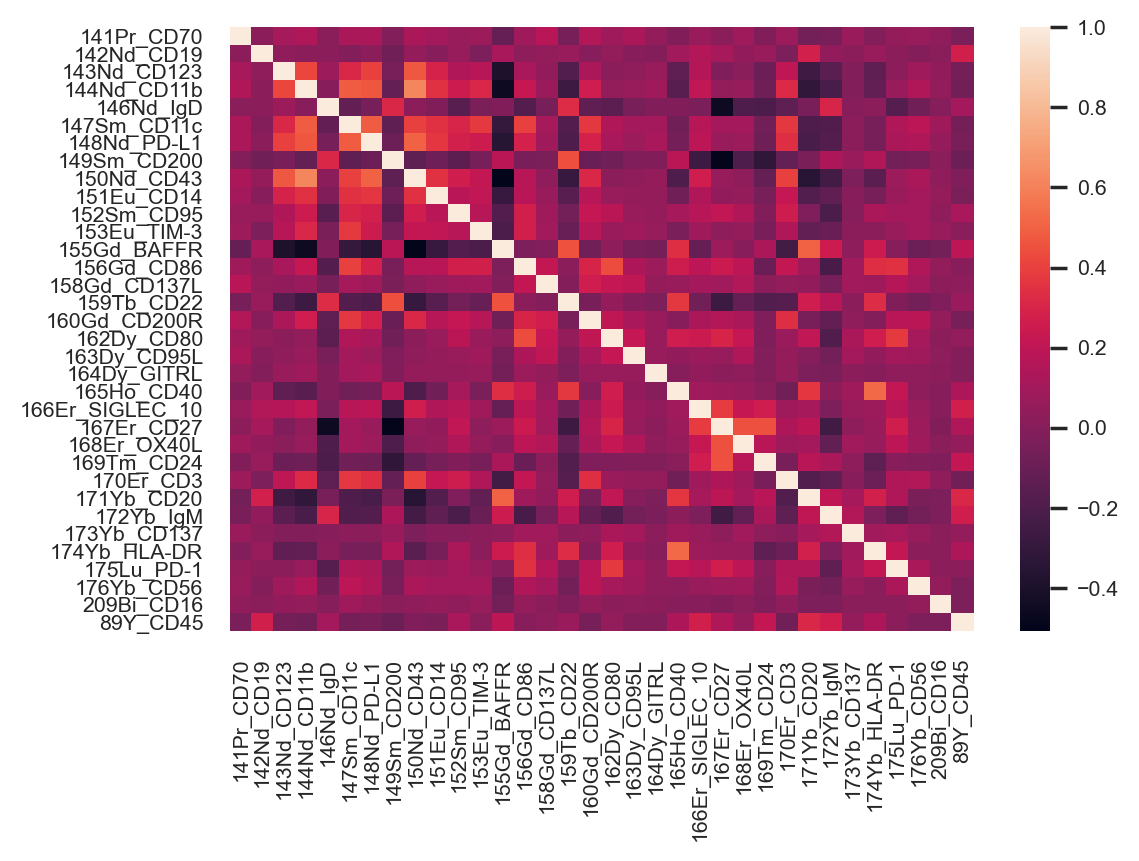

In [8]:
_ = plt.figure(dpi=200)
_ = sns.set(font_scale=0.7)

# get correlation for just the antibody features 
_ = sns.clustermap(counts[antibody_features].corr(), xticklabels=True, yticklabels=True)

plt.savefig("../output/plots/clustermap.png", dpi=300, bbox_inches="tight")

#### Per Cluster

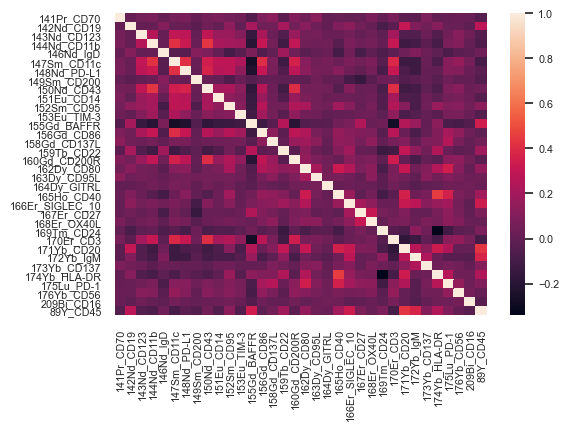

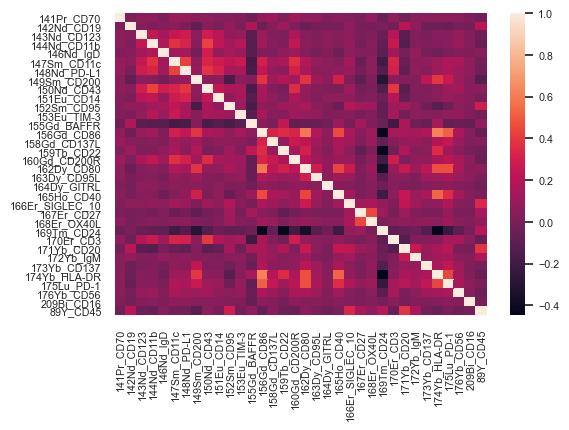

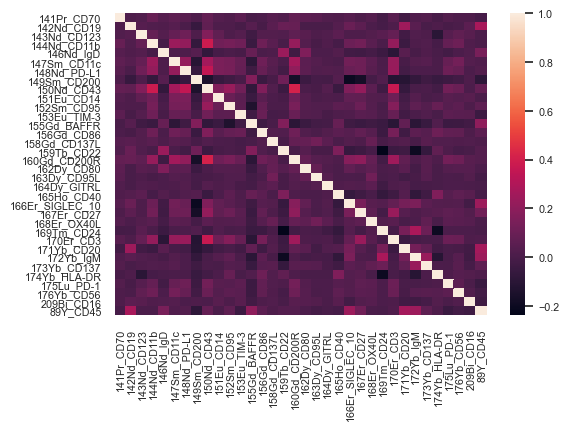

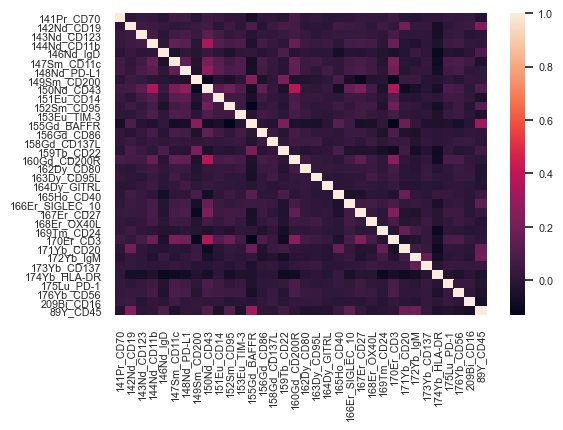

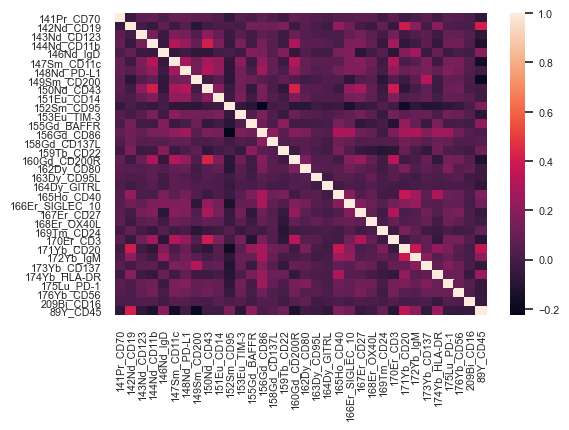

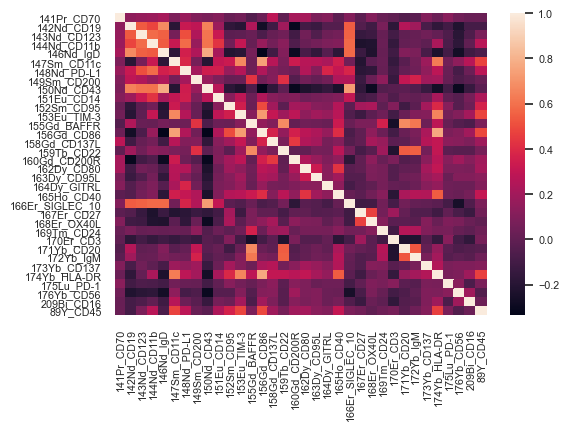

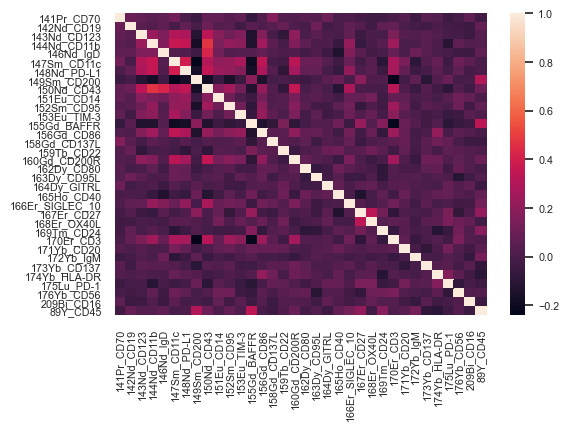

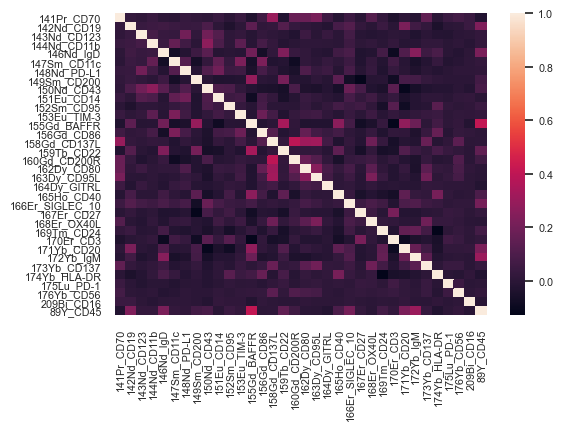

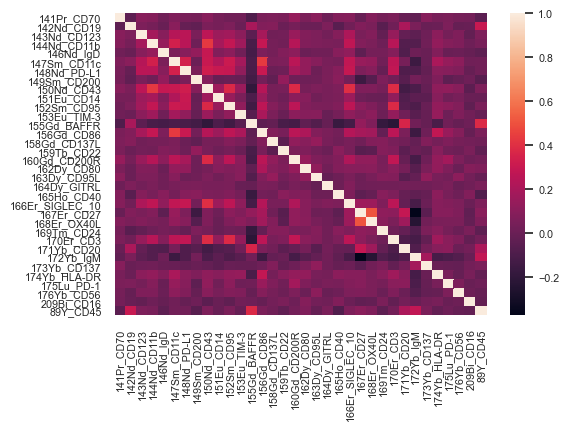

In [9]:
# for each cluster 
for cluster in full_matrix["cluster_id"].unique().tolist(): 
    # subset matrix to that cluster 
    tmp = full_matrix[full_matrix["cluster_id"]==cluster]
    
    _ = plt.figure(dpi=100)
    _ = sns.set(font_scale=0.7)
    
    
    _ = sns.heatmap(tmp[antibody_features].corr(), xticklabels=True, yticklabels=True)

## Inspect Distributions

### Using this to determine the tests for differential analysis. 

<ipython-input-10-00c56d3657a7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _ = plt.figure(dpi=50)


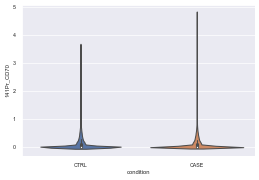

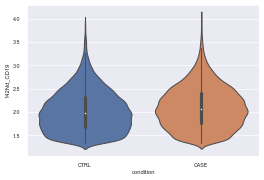

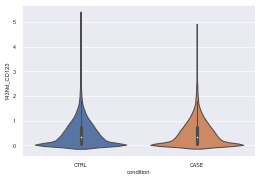

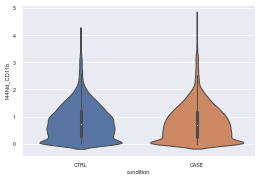

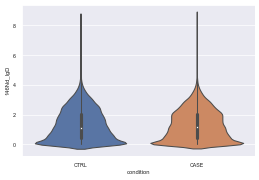

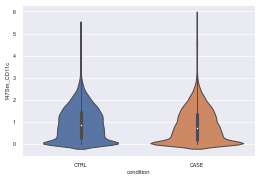

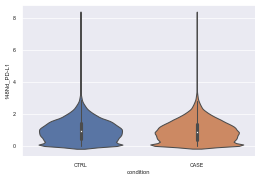

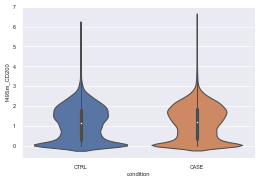

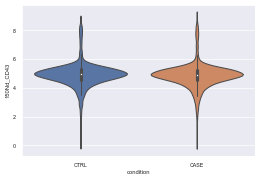

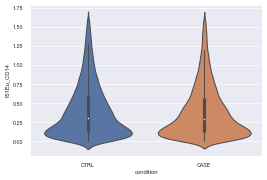

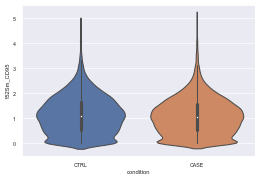

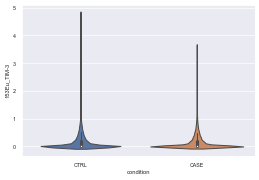

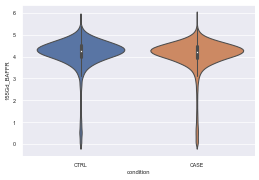

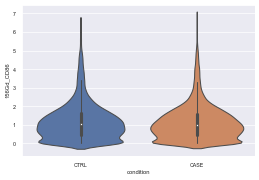

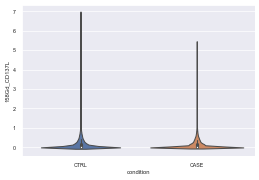

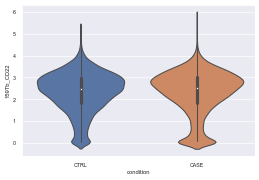

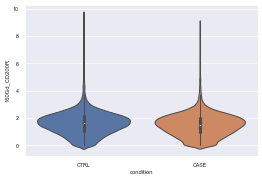

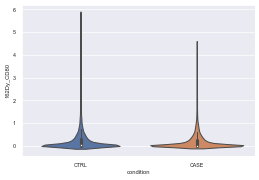

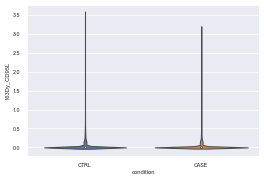

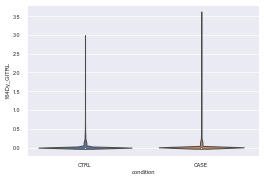

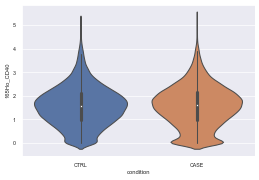

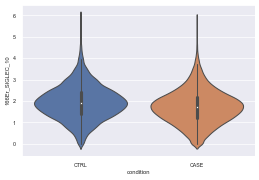

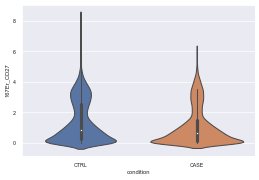

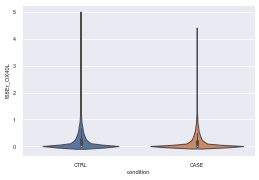

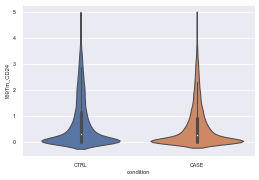

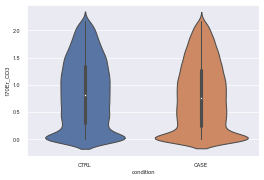

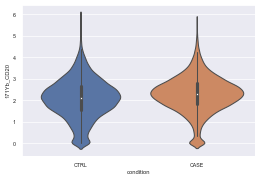

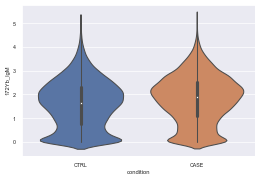

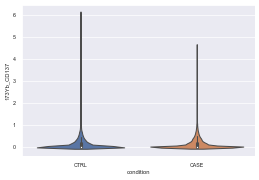

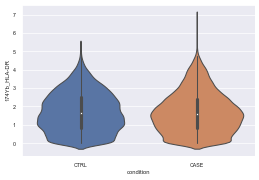

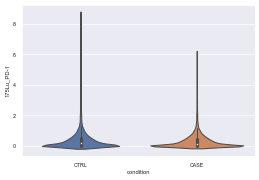

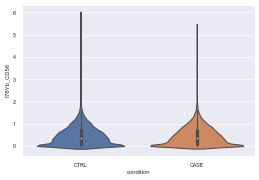

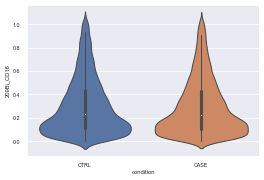

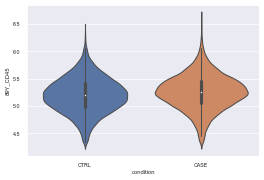

In [10]:
for feature in antibody_features: 
    _ = plt.figure(dpi=50)
    
    _ = sns.violinplot(data = full_matrix, x='condition', y=feature)

## Differential Analysis 

### All Cells 

#### Features

In [11]:
all_cells_df = pd.DataFrame(columns=["Feature", "CASE Median", "CTRL Median"])
p_vals = []

# for each antibody 
for feature in antibody_features: 
    
    # subset by condition
    case_df = full_matrix[full_matrix["condition"]=="CASE"][feature].to_list() 
    ctrl_df = full_matrix[full_matrix["condition"]=="CTRL"][feature].to_list()
    
    # Mann Whitney U test
    U_stat, p_value = scipy.stats.mannwhitneyu(
        case_df, 
        ctrl_df,
    )
    
    p_vals.append(p_value)
    
    # add to dataframe 
    all_cells_df = all_cells_df.append(
        {
            "Feature": feature,
            "CASE Median": np.median(case_df),
            "CTRL Median": np.median(ctrl_df),
        },
        ignore_index=True,
    )
    
all_cells_df["p-value"] = p_vals
all_cells_df

<ipython-input-11-b29ae093c7f0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_df = all_cells_df.append(
<ipython-input-11-b29ae093c7f0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_df = all_cells_df.append(
<ipython-input-11-b29ae093c7f0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_df = all_cells_df.append(
<ipython-input-11-b29ae093c7f0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_df = all_cells_df.append(
<ipython-input-11-b29ae093c7f0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a

,Feature,CASE Median,CTRL Median,p-value
0,141Pr_CD70,0.000000,0.000000,2.844777e-03
1,142Nd_CD19,2.072883,1.978629,1.528888e-71
2,143Nd_CD123,0.346782,0.342096,3.348136e-01
3,144Nd_CD11b,0.683256,0.736593,5.115407e-12
4,146Nd_IgD,1.157493,1.130616,4.134273e-01
5,147Sm_CD11c,0.710236,0.844829,2.929094e-34
6,148Nd_PD-L1,0.848143,0.894613,1.872543e-07
7,149Sm_CD200,1.211622,1.122542,1.843223e-08
8,150Nd_CD43,4.896617,4.945369,2.179590e-19
9,151Eu_CD14,0.288950,0.312272,3.598648e-08


In [12]:
# get bonferroni p values 
bonferroni = statsmodels.stats.multitest.multipletests(pvals=p_vals, alpha=0.05, method='bonferroni')[1]

all_cells_df["Bonferroni P-Values"] = bonferroni

# sort df by bonferroni values 
all_cells_df = all_cells_df.sort_values(by="Bonferroni P-Values", ascending=True)

# output to CSV 
all_cells_df.to_csv("../output/tables/feature_all_cells.csv", index=False)

all_cells_df

,Feature,CASE Median,CTRL Median,p-value,Bonferroni P-Values
21,166Er_SIGLEC_10,1.711334,1.917484,7.166128e-146,2.436484e-144
22,167Er_CD27,0.625036,0.872312,2.115003e-106,7.191011e-105
26,171Yb_CD20,2.302019,2.112715,1.657030e-104,5.633903e-103
27,172Yb_IgM,1.893684,1.654021,4.645695e-93,1.579536e-91
1,142Nd_CD19,2.072883,1.978629,1.528888e-71,5.198218e-70
33,89Y_CD45,5.260555,5.199109,9.447322e-68,3.212090e-66
16,160Gd_CD200R,1.524343,1.639710,1.896344e-46,6.447568e-45
12,155Gd_BAFFR,4.214696,4.270335,2.382845e-39,8.101673e-38
5,147Sm_CD11c,0.710236,0.844829,2.929094e-34,9.958920e-33
23,168Er_OX40L,0.000000,0.017978,7.445058e-34,2.531320e-32


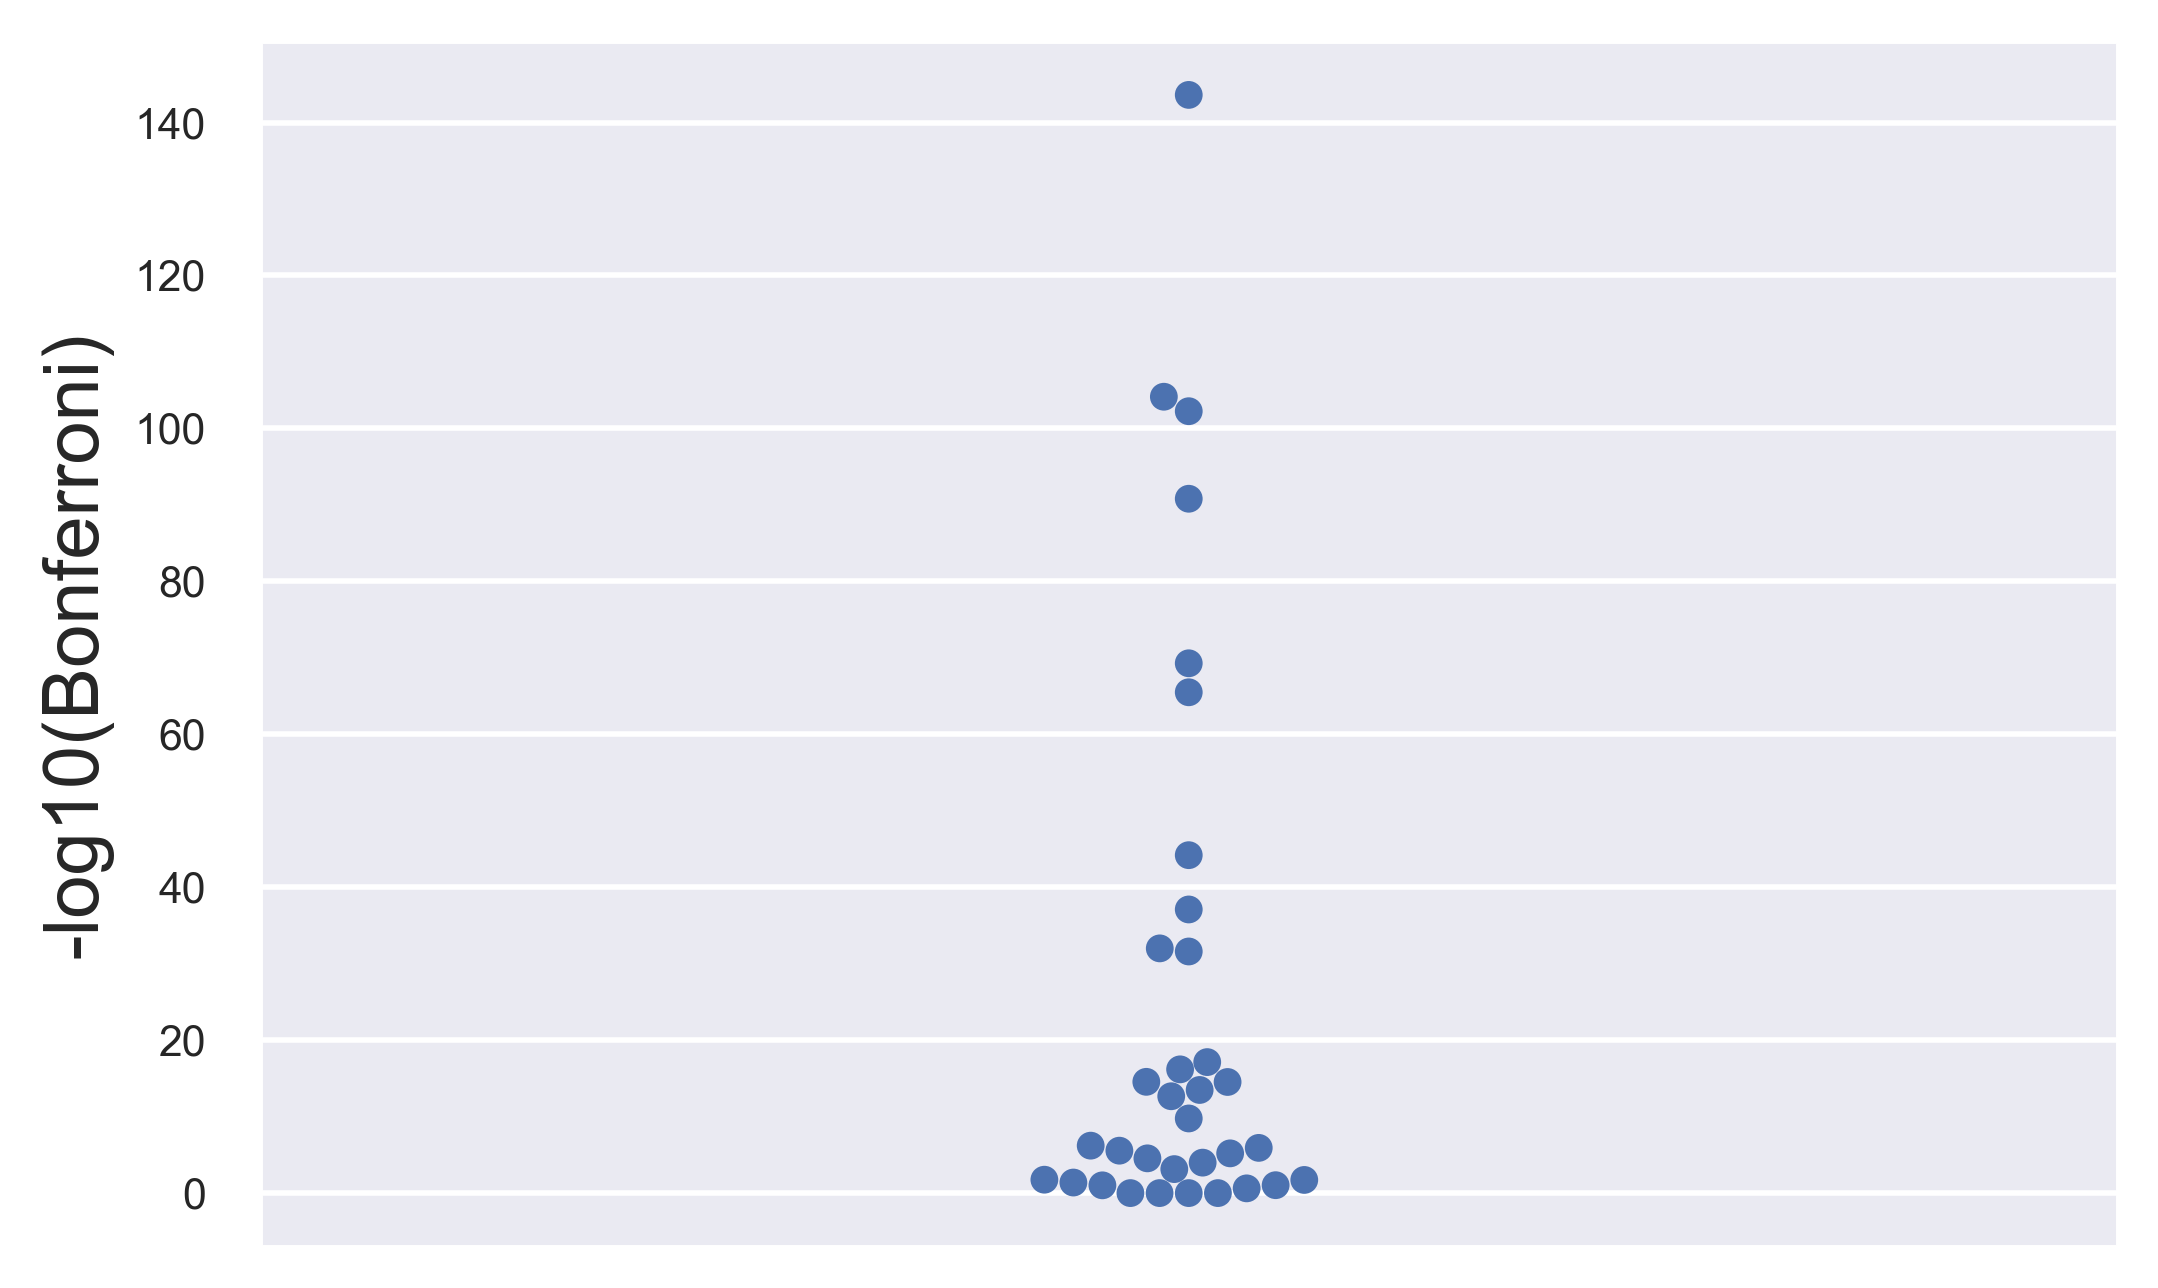

In [13]:
_ = plt.figure(dpi=400)
_ = plt.ylabel("-log10(Bonferroni)", fontsize=14)

_ = sns.swarmplot(y=np.negative(np.log10(all_cells_df["Bonferroni P-Values"].to_list())))

plt.savefig("../output/plots/all_values_features.png", dpi=300)

#### Metals

In [14]:
all_cells_metal_df = pd.DataFrame(columns=["Feature", "CASE Median", "CTRL Median"])
p_vals = []

# for each antibody 
for feature in metal_features: 
    
    # subset by condition
    case_df = full_matrix[full_matrix["condition"]=="CASE"][feature].to_list() 
    ctrl_df = full_matrix[full_matrix["condition"]=="CTRL"][feature].to_list()
    
    # Mann Whitney U test
    U_stat, p_value = scipy.stats.mannwhitneyu(
        case_df, 
        ctrl_df,
    )
    
    p_vals.append(p_value)
    
    # add to dataframe 
    all_cells_metal_df = all_cells_metal_df.append(
        {
            "Feature": feature,
            "CASE Median": np.median(case_df),
            "CTRL Median": np.median(ctrl_df),
        },
        ignore_index=True,
    )
    
all_cells_metal_df["p-value"] = p_vals

# get bonferroni p values 
bonferroni = statsmodels.stats.multitest.multipletests(pvals=p_vals, alpha=0.05, method='bonferroni')[1]

all_cells_metal_df["Bonferroni P-Values"] = bonferroni

# sort df by bonferroni values 
all_cells_metal_df = all_cells_metal_df.sort_values(by="Bonferroni P-Values", ascending=True)

# output to CSV 
all_cells_metal_df.to_csv("../output/tables/metal_all_cells.csv", index=False)

all_cells_metal_df

<ipython-input-14-9d7d2dcb8ff1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_metal_df = all_cells_metal_df.append(
<ipython-input-14-9d7d2dcb8ff1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_metal_df = all_cells_metal_df.append(
<ipython-input-14-9d7d2dcb8ff1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_metal_df = all_cells_metal_df.append(
<ipython-input-14-9d7d2dcb8ff1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_cells_metal_df = all_cells_metal_df.append(
<ipython-input-14-9d7d2dcb8ff1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

,Feature,CASE Median,CTRL Median,p-value,Bonferroni P-Values
1,104Pd,2.178711,2.754831,0.000000e+00,0.000000e+00
0,102Pd,4.926442,5.085682,4.984803e-249,1.196353e-247
21,195Pt,3.867137,4.050494,1.710485e-177,4.105163e-176
20,194Pt,3.947585,4.099680,2.081893e-157,4.996544e-156
22,198Pt,1.930329,2.115923,2.193670e-122,5.264809e-121
4,108Pd,1.981306,2.326682,1.673541e-101,4.016500e-100
11,142Ce,2.073923,1.980109,6.341606e-71,1.521985e-69
14,160Dy,1.524650,1.639957,9.433094e-47,2.263943e-45
2,105Pd,2.756183,2.748882,3.367817e-31,8.082760e-30
5,110Pd,3.417604,1.746975,1.495771e-24,3.589851e-23


<ipython-input-15-6e5f33e58691>:4: RuntimeWarning: divide by zero encountered in log10
  _ = sns.swarmplot(y=np.negative(np.log10(all_cells_metal_df["Bonferroni P-Values"].to_list())))


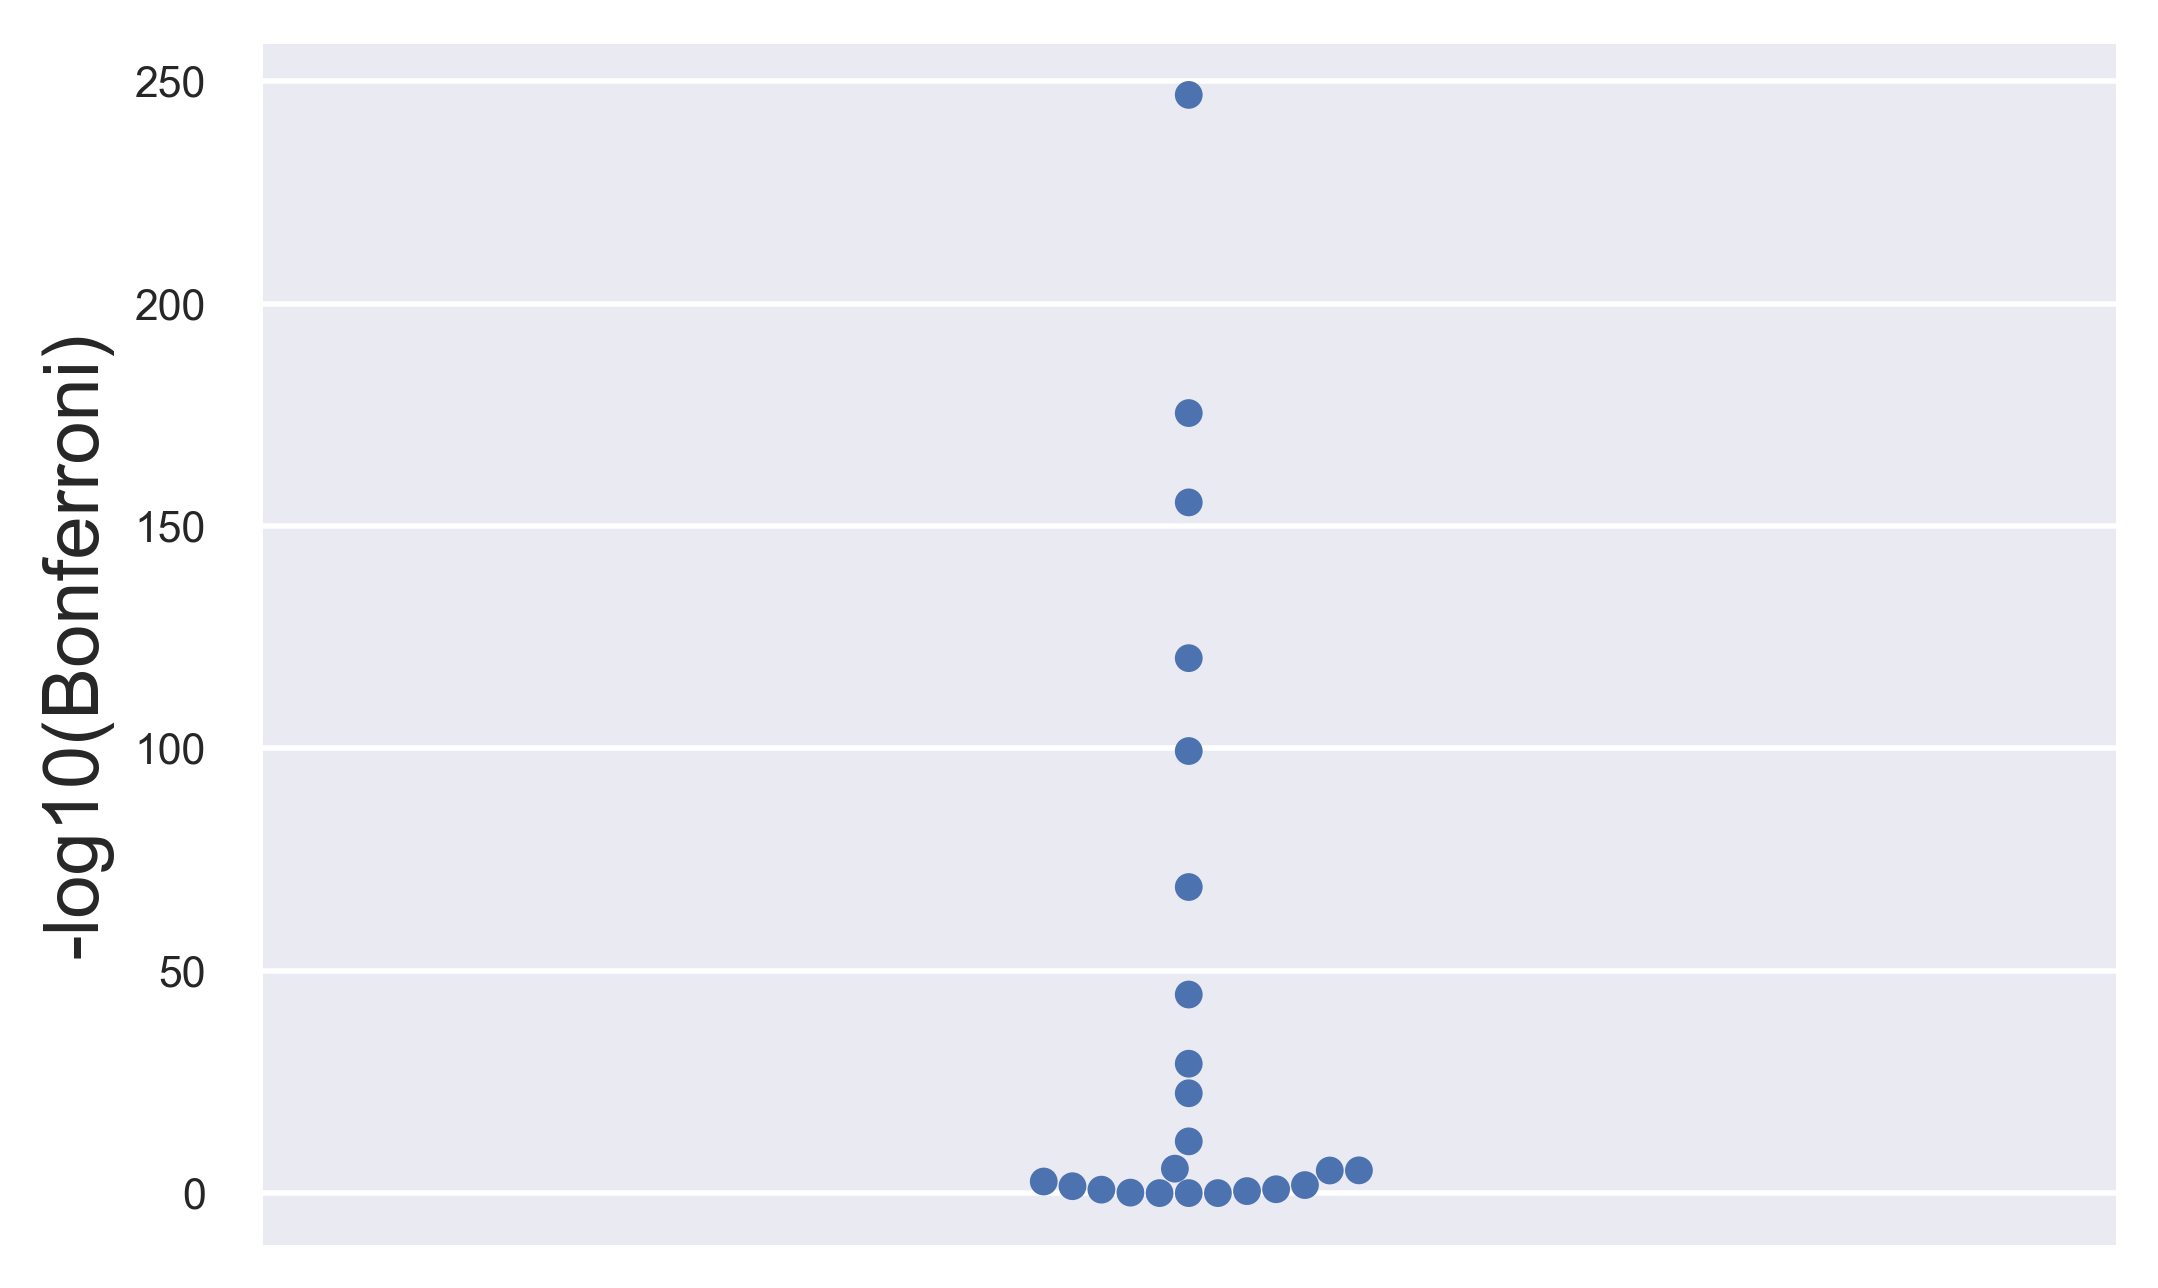

In [15]:
_ = plt.figure(dpi=400)
_ = plt.ylabel("-log10(Bonferroni)", fontsize=14)

_ = sns.swarmplot(y=np.negative(np.log10(all_cells_metal_df["Bonferroni P-Values"].to_list())))

plt.savefig("../output/plots/all_values_metal.png", dpi=300)

### Cell-type Specific

#### Features 

In [16]:
%%capture

cell_type_df = pd.DataFrame(columns=["Feature", "CASE Median", "CTRL Median", "Cluster Number", "P Val"])

# for each cell cluster 
for cluster in full_matrix["cluster_id"].unique().tolist(): 
    
    # subset to that cluster 
    cluster_df = full_matrix[full_matrix["cluster_id"] == cluster]
    
    for feature in antibody_features:
        # subset by condition
        case_df = cluster_df[cluster_df["condition"]=="CASE"][feature].to_list() 
        ctrl_df = cluster_df[cluster_df["condition"]=="CTRL"][feature].to_list()

        # Mann Whitney U test
        U_stat, p_value = scipy.stats.mannwhitneyu(
            case_df, 
            ctrl_df,
        )

        # add to dataframe 
        cell_type_df = cell_type_df.append(
            {
                "Feature": feature,
                "CASE Median": np.median(case_df),
                "CTRL Median": np.median(ctrl_df),
                "Cluster Number": cluster, 
                "P Val": p_value
            },
            ignore_index=True,
        )
        
        

In [17]:
# get bonferroni p values 
bonferroni = statsmodels.stats.multitest.multipletests(pvals=cell_type_df["P Val"].to_list(), alpha=0.05, method='bonferroni')[1]

cell_type_df["Bonferroni P-Values"] = bonferroni

# sort df by bonferroni values 
cell_type_df = cell_type_df.sort_values(by="Bonferroni P-Values", ascending=True)

# output to CSV 
cell_type_df.to_csv("../output/tables/feature_cell_type_specific.csv", index=False)

cell_type_df

,Feature,CASE Median,CTRL Median,Cluster Number,P Val,Bonferroni P-Values
169,89Y_CD45,5.411484,5.143483,5,7.181977e-78,2.197685e-75
264,171Yb_CD20,2.014522,1.754506,8,3.507428e-66,1.073273e-63
271,89Y_CD45,5.208460,5.094668,8,1.369200e-57,4.189751e-55
92,169Tm_CD24,0.440529,0.174250,3,1.554634e-52,4.757181e-50
239,142Nd_CD19,2.040432,1.895839,8,1.105037e-48,3.381414e-46
60,171Yb_CD20,2.902916,2.602524,2,8.321722e-43,2.546447e-40
248,152Sm_CD95,1.315497,1.472014,8,4.343131e-40,1.328998e-37
135,89Y_CD45,5.170457,5.075315,4,6.772760e-36,2.072464e-33
265,172Yb_IgM,1.921355,1.713512,8,8.848765e-30,2.707722e-27
137,142Nd_CD19,2.176746,1.957258,5,1.073000e-28,3.283380e-26


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


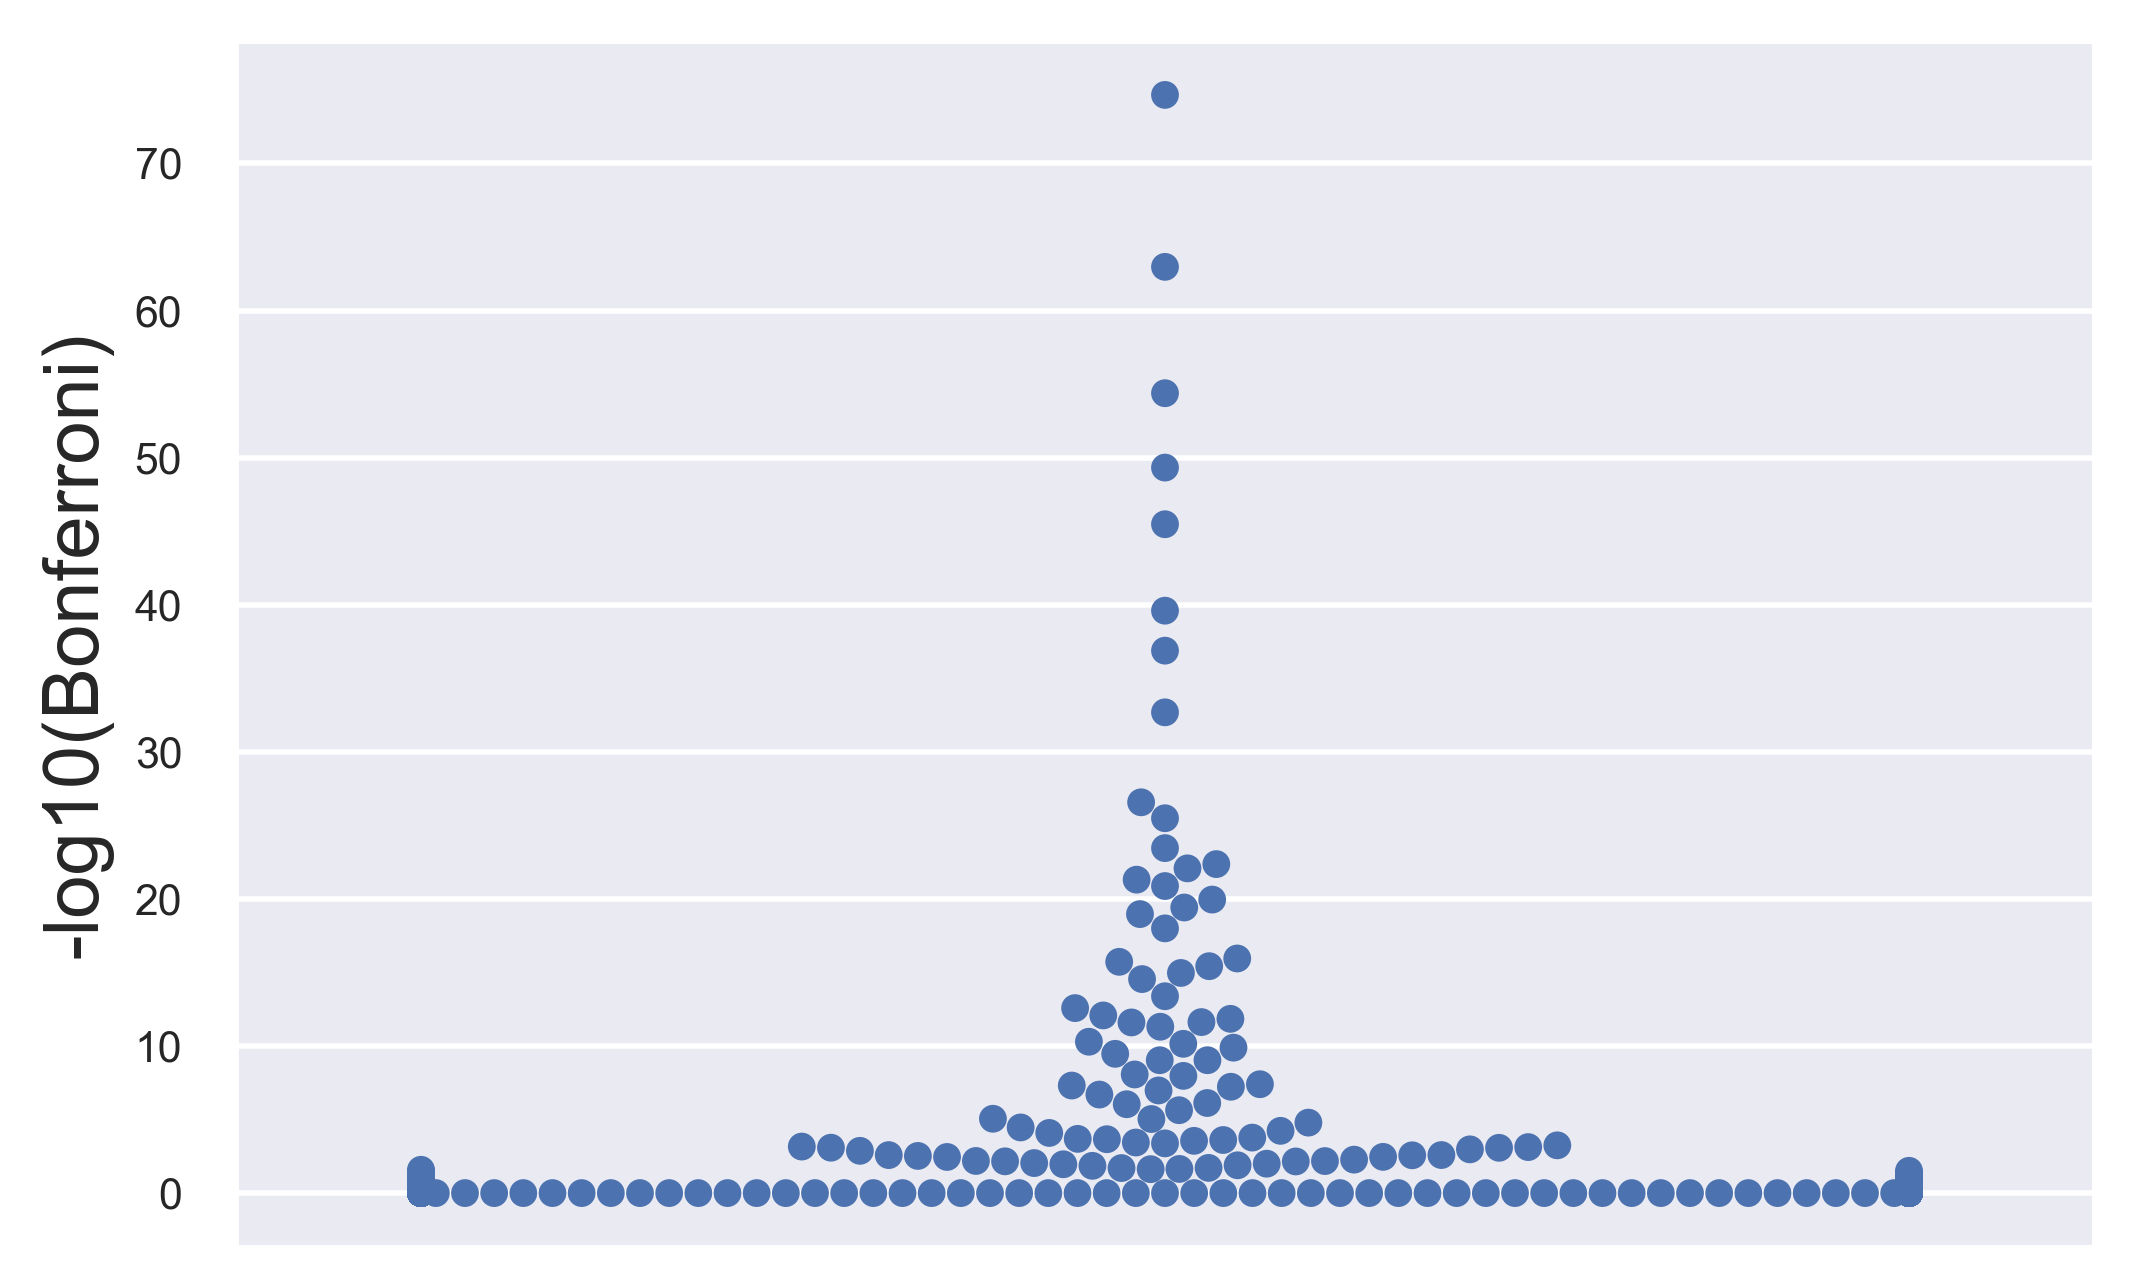

In [18]:
_ = plt.figure(dpi=400)
_ = plt.ylabel("-log10(Bonferroni)", fontsize=14)

_ = sns.swarmplot(y=np.negative(np.log10(cell_type_df["Bonferroni P-Values"].to_list())))

plt.savefig("../output/plots/cell_type_specific_features.png", dpi=300)

#### Metal

In [19]:
%%capture

cell_type_metal_df = pd.DataFrame(columns=["Feature", "CASE Median", "CTRL Median", "Cluster Number", "P Val"])

# for each cell cluster 
for cluster in full_matrix["cluster_id"].unique().tolist(): 
    
    # subset to that cluster 
    cluster_df = full_matrix[full_matrix["cluster_id"] == cluster]
    
    for feature in metal_features:
        # subset by condition
        case_df = cluster_df[cluster_df["condition"]=="CASE"][feature].to_list() 
        ctrl_df = cluster_df[cluster_df["condition"]=="CTRL"][feature].to_list()

        # Mann Whitney U test
        U_stat, p_value = scipy.stats.mannwhitneyu(
            case_df, 
            ctrl_df,
        )

        # add to dataframe 
        cell_type_metal_df = cell_type_metal_df.append(
            {
                "Feature": feature,
                "CASE Median": np.median(case_df),
                "CTRL Median": np.median(ctrl_df),
                "Cluster Number": cluster, 
                "P Val": p_value
            },
            ignore_index=True,
        )
        


,Feature,CASE Median,CTRL Median,Cluster Number,P Val,Bonferroni P-Values
169,104Pd,1.825651,4.479117,8,0.000000e+00,0.000000e+00
97,104Pd,2.169136,4.862359,5,9.825119e-178,2.122226e-175
170,105Pd,4.545830,2.466001,8,2.021519e-167,4.366481e-165
98,105Pd,2.418070,4.949967,5,8.578647e-151,1.852988e-148
101,110Pd,4.738035,1.430890,5,8.264334e-127,1.785096e-124
168,102Pd,4.746280,4.997769,8,1.907806e-116,4.120861e-114
100,108Pd,4.918942,1.916632,5,9.596682e-114,2.072883e-111
5,110Pd,4.629874,1.687856,1,5.830008e-102,1.259282e-99
117,195Pt,3.536031,4.094889,5,4.875201e-101,1.053043e-98
50,105Pd,2.610024,4.528868,3,2.752630e-93,5.945680e-91


<ipython-input-20-ea3bafeb9809>:17: RuntimeWarning: divide by zero encountered in log10
  _ = sns.swarmplot(y=np.negative(np.log10(cell_type_metal_df["Bonferroni P-Values"].to_list())))
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


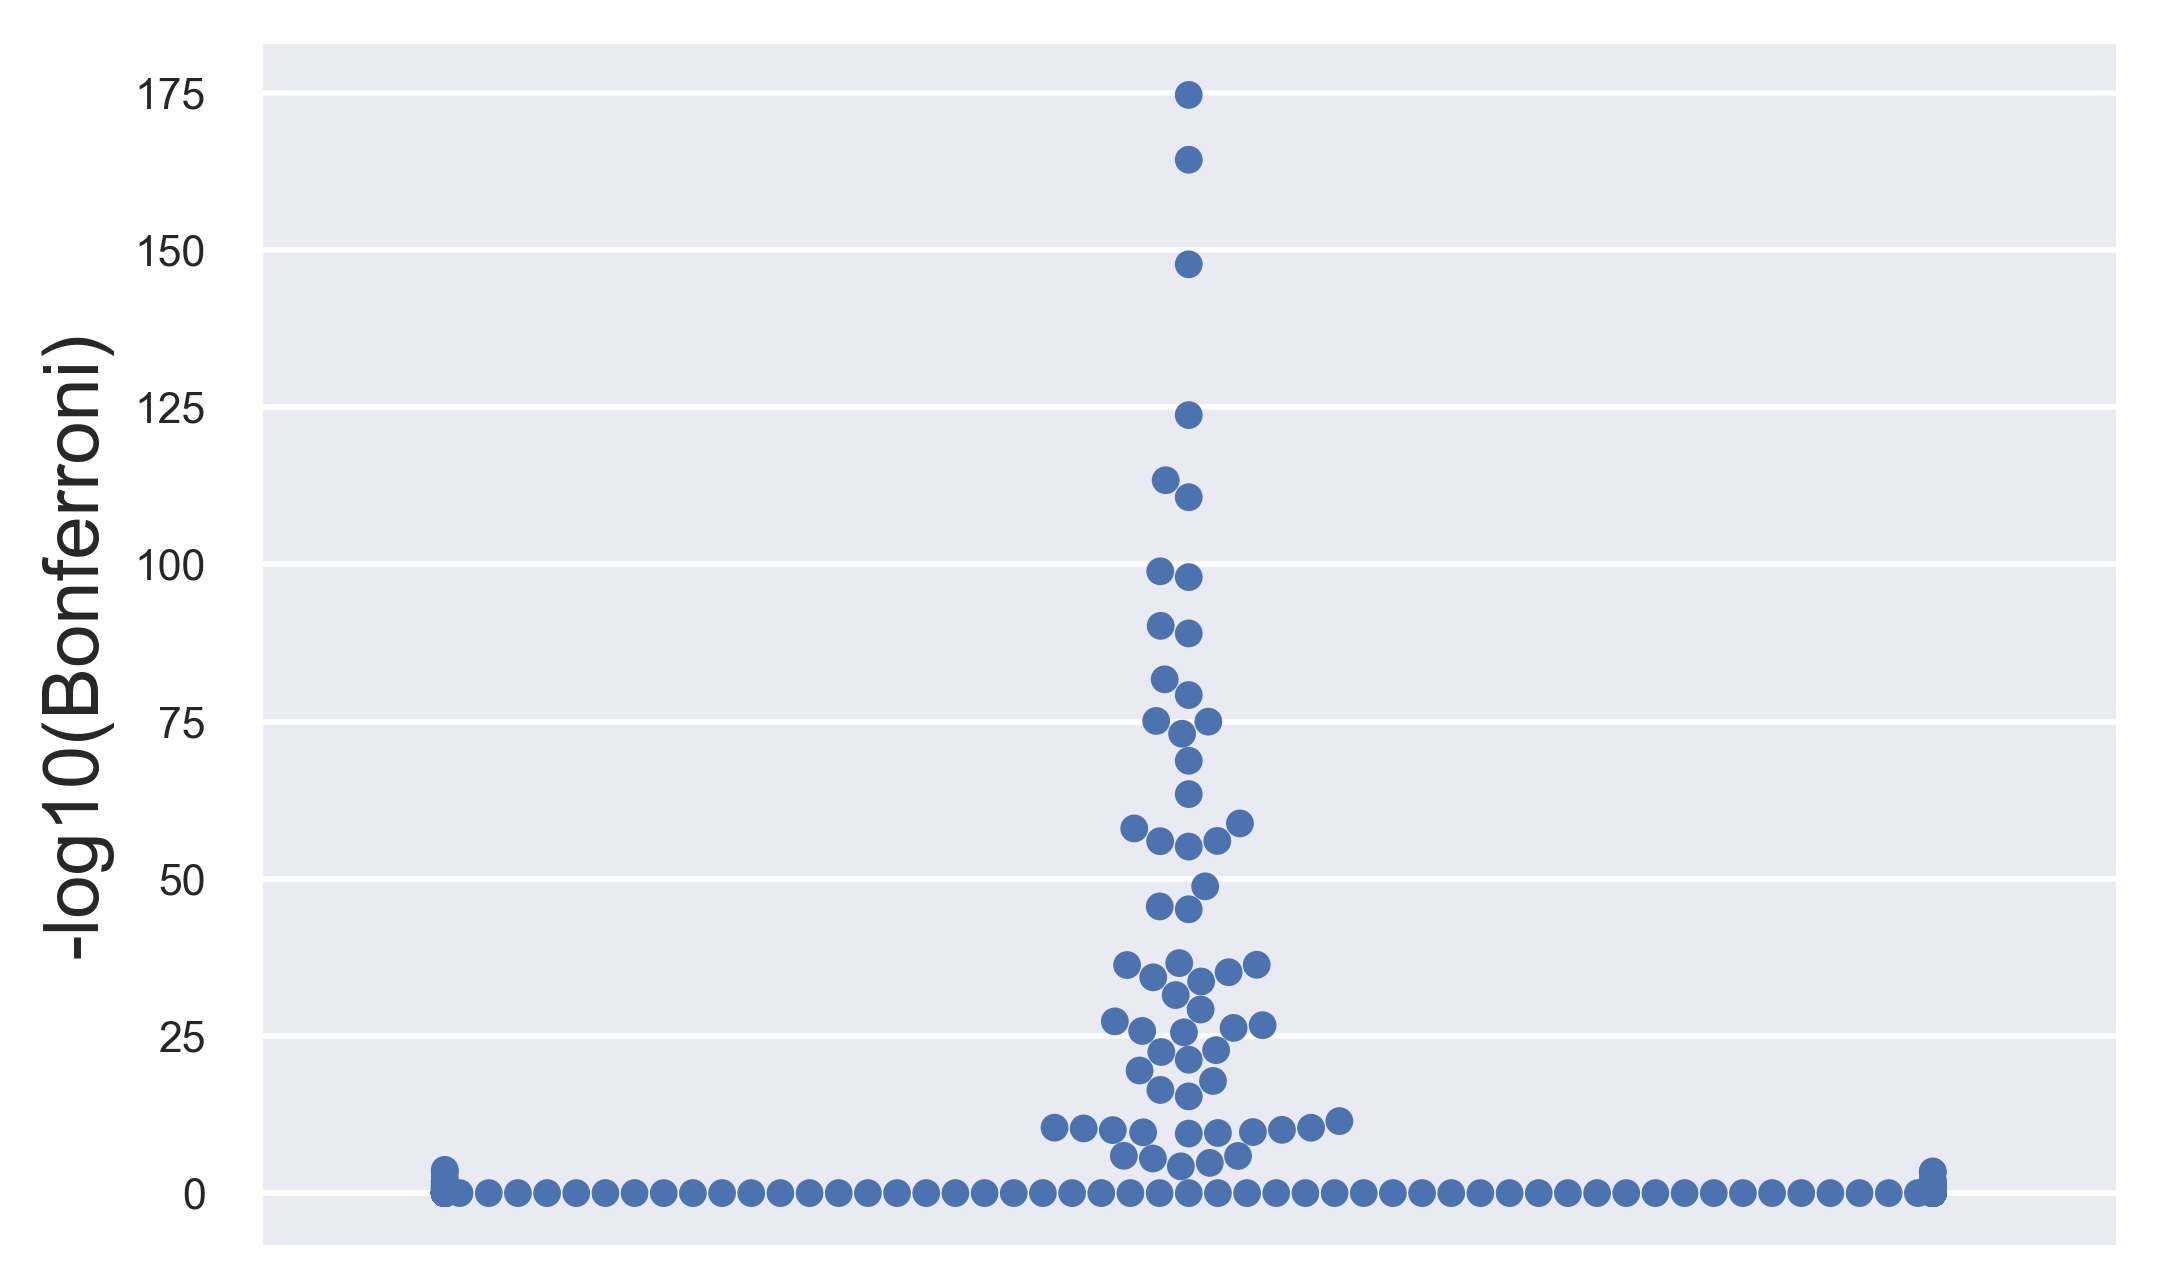

In [20]:
# get bonferroni p values 
bonferroni = statsmodels.stats.multitest.multipletests(pvals=cell_type_metal_df["P Val"].to_list(), alpha=0.05, method='bonferroni')[1]

cell_type_metal_df["Bonferroni P-Values"] = bonferroni

# sort df by bonferroni values 
cell_type_metal_df = cell_type_metal_df.sort_values(by="Bonferroni P-Values", ascending=True)

# output to CSV 
cell_type_metal_df.to_csv("../output/tables/metal_cell_type_specific.csv", index=False)

cell_type_metal_df

_ = plt.figure(dpi=400)
_ = plt.ylabel("-log10(Bonferroni)", fontsize=14)

_ = sns.swarmplot(y=np.negative(np.log10(cell_type_metal_df["Bonferroni P-Values"].to_list())))

plt.savefig("../output/plots/cell_type_specific_metal.png", dpi=300)